In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
import numpy as np

In [17]:
DATA_FILE = '../data/Problem_C_Data_Wordle.xlsx'
df = pd.read_excel(DATA_FILE,header=1)
df.drop(columns=['Unnamed: 0'],inplace=True)
df.head()
df.rename(columns={'Date':'date','Contest number':'contest_num','Word':'word','Number of  reported results':'num_results','Number in hard mode':'num_hardmode','1 try':'in1','2 tries':'in2','3 tries':'in3','4 tries':'in4','5 tries':'in5','6 tries':'in6','7 or more tries (X)':'over6'},inplace=True)


In [18]:
df.loc[15,'word'] = 'probe'
df.loc[35,'word'] = 'clean'
df.loc[246,'word'] = 'trash'
df.loc[353,'word'] = 'favor'
df.loc[20,'word'] = 'naive'

In [19]:
df["date"] = pd.to_datetime(df["date"])
df["day_of_week"] = df["date"].dt.dayofweek

In [20]:
df["day_of_week"] = df["date"].dt.dayofweek
print(df)

          date  contest_num   word  num_results  num_hardmode  in1  in2  in3  \
0   2022-12-31          560  manly        20380          1899    0    2   17   
1   2022-12-30          559  molar        21204          1973    0    4   21   
2   2022-12-29          558  havoc        20001          1919    0    2   16   
3   2022-12-28          557  impel        20160          1937    0    3   21   
4   2022-12-27          556  condo        20879          2012    0    2   17   
..         ...          ...    ...          ...           ...  ...  ...  ...   
354 2022-01-11          206  drink       153880          3017    1    9   35   
355 2022-01-10          205  query       107134          2242    1    4   16   
356 2022-01-09          204  gorge        91477          1913    1    3   13   
357 2022-01-08          203  crank       101503          1763    1    5   23   
358 2022-01-07          202  slump        80630          1362    1    3   23   

     in4  in5  in6  over6  day_of_week 

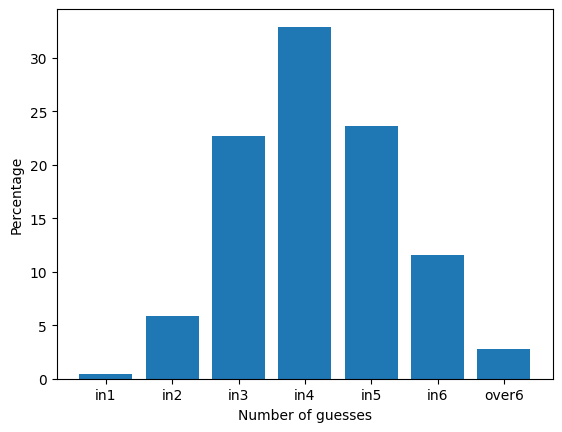

In [21]:
fig, ax = plt.subplots()

guesses = ['in1', 'in2', 'in3', 'in4', 'in5', 'in6', 'over6']

percentages = np.array([df['in1'], df['in2'], df['in3'], df['in4'], df['in5'], df['in6'], df['over6']])

ax.bar(guesses, percentages.mean(axis=1))

ax.set_xlabel('Number of guesses')
ax.set_ylabel('Percentage')

plt.show()

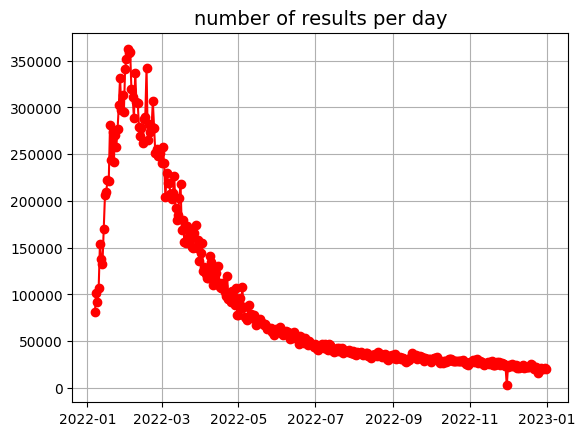

In [22]:
plt.plot(df['date'], df['num_results'], color='red', marker='o')
plt.title('number of results per day', fontsize=14)
plt.grid(True)
plt.show()
